### ECE 657A: Data and Knowledge Modeling and Analysis
#### Assignment 2: Data Cleaning and Dimensionality Reduction


**Submitted By Group 21:**<br>

**Ankush Malhotra - 20709477**<br>

**Shreesha Pillangere Ramachandra – 20740615**<br>

**Gunasekaran Marati Saravanan - 20715573**<br>

In [1]:
#Importing libraries :
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


## Question I:[40] Revisiting HW4 Bank Classification with New Tools (for dataset A)

### 1. Load a simple dataset and perform some basic data preprocessing to fill out ”unknowns”, outliers or other invalid data. Explain what preprocessing was performed and why. Also, change categorical data into numerical features using pandas.get dummies [5].

In [6]:
bank_data = pd.read_csv('bank-additional.csv', sep = ';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
bank_data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [28]:
for col in ['job','marital','education','default', 'housing', 'loan', 'poutcome']:
    print(col)
    print('****************')
    print(data[col].value_counts(),'\n')

job
****************
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
admin              39
Name: job, dtype: int64 

marital
****************
married     2520
single      1153
divorced     446
Name: marital, dtype: int64 

education
****************
university.degree      1431
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
illiterate                1
Name: education, dtype: int64 

default
****************
no     4118
yes       1
Name: default, dtype: int64 

housing
****************
yes    2280
no     1839
Name: housing, dtype: int64 

loan
****************
no     3454
yes     665
Name: loan, dtype: int64 

poutcome
****************
nonexistent    3523
failure         454
success         142
Name: poutc

In [10]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
num_columns = ['age', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
cal_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

In [13]:
bank_data.shape

(4119, 21)

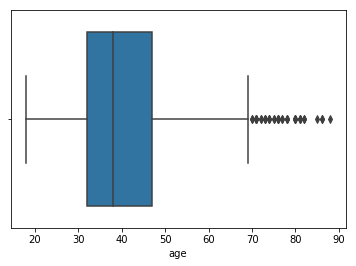

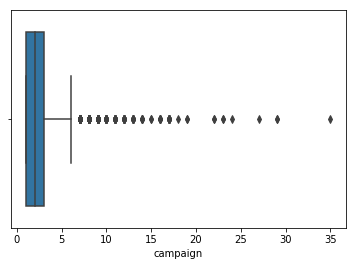

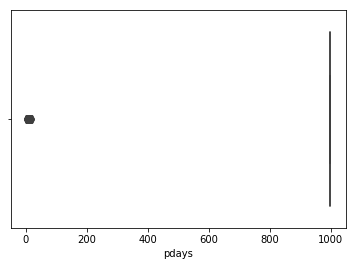

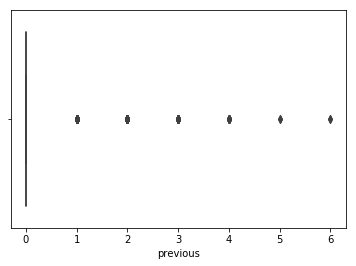

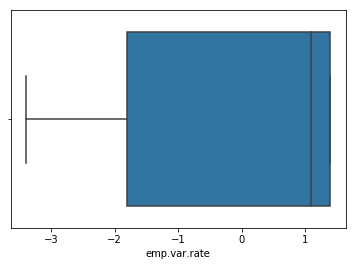

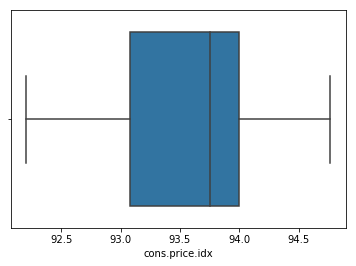

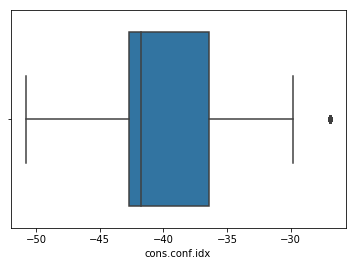

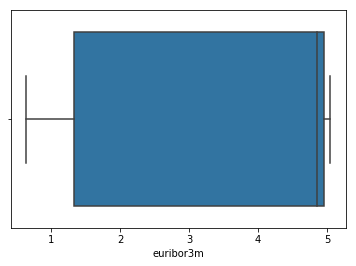

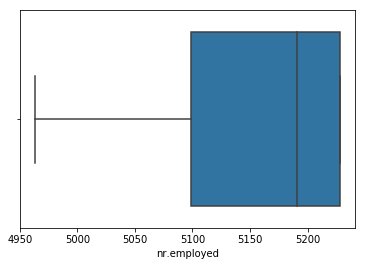

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
for i, col in enumerate(num_columns):
    plt.figure(i)
    sns.boxplot(x=bank_data[col])

In [29]:
data = bank_data[num_columns + cal_columns]
y_data = bank_data.y

In [30]:
# Data Prepreocessing:
#Replaced "unknown" with mode
data['job'].replace(to_replace='unknown',value='admin.',inplace=True)
data['marital'].replace(to_replace='unknown',value='married',inplace=True)
data['education'].replace(to_replace='unknown',value='university.degree',inplace=True)
data['default'].replace(to_replace='unknown',value='no',inplace=True)
data['housing'].replace(to_replace='unknown',value='yes',inplace=True)
data['loan'].replace(to_replace='unknown',value='no',inplace=True)

In [32]:
X_data = pd.get_dummies(data)
X_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome

In [53]:
X_data.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,-0.585293,...,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,-0.585293,...,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.585293,...,-0.130526,-0.12563,-0.478733,-0.511809,-0.513697,-0.506516,2.044782,-0.351958,0.411308,-0.188958
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.585293,...,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,1.708545,...,-0.130526,-0.12563,-0.478733,1.953854,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958


In [52]:
X_data.columns

RangeIndex(start=0, stop=56, step=1)

In [34]:
#Data Preprocessing:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data=scaler.fit_transform(X_data)
X_data=pd.DataFrame(data=X_data)
X_data.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,-0.585293,...,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,-0.585293,...,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.585293,...,-0.130526,-0.12563,-0.478733,-0.511809,-0.513697,-0.506516,2.044782,-0.351958,0.411308,-0.188958
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.585293,...,-0.130526,-0.12563,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,1.708545,...,-0.130526,-0.12563,-0.478733,1.953854,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958


#### For the categorical variables ,the missing data ("unknown") is replaced with mode. Then data is normalized using Standard scaler (Z-score) normalization as part of data preprocessing steps.

### 2. Divide data into train and test portions, justify your split decision [5].

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=101)

### Data is split into training set (70%) and test set(30%). This split is provides a good learning for the model on the test set.  

### 3. Apply classification using Decision Trees (DT), Random Forests (RF) and Neural Networks (NN) and run using standard libraries in your language or choice. Indicate the classification properties (example: depth of tree, size of neural network, ensembles for RF) you have chosen and justify. Briefly describe the algorithms employed by the libraries you are using (example ID3, C4.5, C5.0 and CART for DT). Make sure to run the classification on 10 features or more [10].

In [36]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

          no       0.91      0.90      0.91      1102
         yes       0.24      0.25      0.25       134

   micro avg       0.83      0.83      0.83      1236
   macro avg       0.57      0.58      0.58      1236
weighted avg       0.84      0.83      0.83      1236

0.8317152103559871


In [38]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
from sklearn.model_selection import GridSearchCV
param = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'max_leaf_nodes': [2,5,10,15]
}
dt_grid = GridSearchCV(tree.DecisionTreeClassifier(), param, scoring='accuracy',cv=5,n_jobs=10)
dt_grid = dt_grid.fit(X_train, y_train)
dt_grid.best_score_

0.9105098855359001

In [40]:
dt_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
y_pred_dt_grid = dt_grid.predict(X_test)
print(classification_report(y_test,y_pred_dt_grid))
print(accuracy_score(y_test,y_pred_dt_grid))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1102
         yes       0.50      0.19      0.27       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.70      0.58      0.61      1236
weighted avg       0.86      0.89      0.87      1236

0.8915857605177994


**We are using scikit-learn library for Decision Tree Classifier. Scikit-learn uses an optimised version of the CART algorithm. CART (Classification and Regression Trees) constructs binary trees using the feature and threshold that yield the largest information gain at each node.**

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1102
         yes       0.44      0.20      0.28       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.68      0.59      0.61      1236
weighted avg       0.86      0.89      0.87      1236

0.8859223300970874


In [44]:
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
param = {
    'n_estimators':[10,15,20,25],
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15],
    'max_leaf_nodes': [15,20,25,35,50],
    'min_samples_leaf': [1,2,3,5,8,10]
}
rf_grid = GridSearchCV(RandomForestClassifier(), param, scoring='accuracy',cv=5,n_jobs=10)
rf_grid = rf_grid.fit(X_train, y_train)
rf_grid.best_score_

0.9087755809920222

In [46]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=35,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
y_pred_rf_grid = rf_grid.predict(X_test)
print(classification_report(y_test,y_pred_rf_grid))
print(accuracy_score(y_test,y_pred_rf_grid))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1102
         yes       0.55      0.17      0.26       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.73      0.58      0.60      1236
weighted avg       0.87      0.89      0.87      1236

0.8948220064724919


In [48]:
from sklearn.neural_network import MLPClassifier
clf_neural = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=0)
clf_neural.fit(X_train, y_train)
y_pred_nn = clf_neural.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred_nn))
print(accuracy_score(y_test,y_pred_nn))
print(classification_report(y_test,y_pred_nn))
print(accuracy_score(y_test,y_pred_nn))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      1102
         yes       0.00      0.00      0.00       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.79      0.89      0.84      1236

0.8915857605177994
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      1102
         yes       0.00      0.00      0.00       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.79      0.89      0.84      1236

0.8915857605177994


### 4. Create a few plots of your model on the test data, two of the data dimensions at a time, indicating the predicted elements of each class using different colors or shapes. You may need to try plotting various pairs of dimensions to see which provide some interesting result. Be sure to label your axis and legend. Why is separation better on some plots than others [10]?

In [91]:
df_plot = pd.DataFrame(X_test.iloc[:,0:56])
df_plot.columns = X_data.columns
df_plot['Class'] = y_pred_dt
df_plot.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,Class
3489,-0.883778,0.180203,0.201031,1.494607,-1.206054,-0.871264,-1.436846,-1.243440,-0.914779,-0.585293,...,-0.12563,-0.478733,1.953854,-0.513697,-0.506516,-0.489050,2.841247,-2.431270,-0.188958,yes
1380,0.473849,-0.209228,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.772851,0.836535,-0.585293,...,-0.12563,-0.478733,-0.511809,-0.513697,1.974270,-0.489050,-0.351958,0.411308,-0.188958,no
1183,-0.592858,-0.209228,-4.973553,1.494607,-0.118350,-0.655478,-0.326707,0.287672,0.398028,-0.585293,...,-0.12563,-0.478733,-0.511809,-0.513697,-0.506516,2.044782,-0.351958,-2.431270,5.292168,no
1320,1.734503,0.180203,0.201031,-0.351356,0.649441,0.715193,0.892269,0.712852,0.332862,1.708545,...,-0.12563,-0.478733,1.953854,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958,no
74,-0.883778,-0.598660,0.201031,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.585293,...,-0.12563,-0.478733,-0.511809,-0.513697,1.974270,-0.489050,-0.351958,0.411308,-0.188958,no


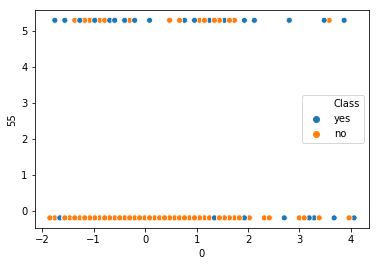

In [95]:
ax = sns.scatterplot(x=0, y=55, hue ="Class",data=df_plot)

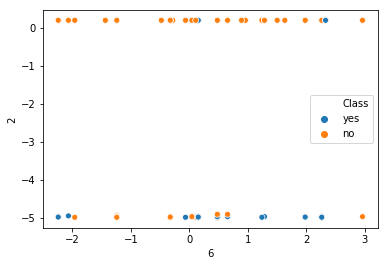

In [96]:
ax = sns.scatterplot(x=6, y=2, hue ="Class",data=df_plot)

#### Why is separation better on some plots than others? Some features have high varaince that makes the plot to separate the two classes.

### 5. Produce a table with the true/false positive/negative metrics as well as accuracies. Compare the values using bar charts [5]. HINT: classification report from sklearn.metrics

In [58]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test, y_pred_dt)
C

array([[994, 108],
       [100,  34]], dtype=int64)

### Thus in binary classification, the count of true negatives is C(0,0) , false negatives is C(1, 0) , true positives is (1, 1) and false positives is C(0, 1).


In [97]:
true_negatives = C[0][0]
false_negetives = C[1][0]
true_positives = C[1][1]
false_positives = C[0][1]

In [60]:
print("******************Decision Tree Metrics*****************")
print(classification_report(y_test,y_pred_dt))

******************Decision Tree Metrics*****************
              precision    recall  f1-score   support

          no       0.91      0.90      0.91      1102
         yes       0.24      0.25      0.25       134

   micro avg       0.83      0.83      0.83      1236
   macro avg       0.57      0.58      0.58      1236
weighted avg       0.84      0.83      0.83      1236



In [61]:
print("******************Random Forest Metrics*****************")
print(classification_report(y_test,y_pred_rf))

******************Random Forest Metrics*****************
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1102
         yes       0.44      0.20      0.28       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.68      0.59      0.61      1236
weighted avg       0.86      0.89      0.87      1236



In [62]:
print("******************Neural Network Metrics*****************")
print(classification_report(y_test,y_pred_nn))

******************Neural Network Metrics*****************
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      1102
         yes       0.00      0.00      0.00       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.79      0.89      0.84      1236



In [63]:
from sklearn.metrics import precision_recall_fscore_support as score
import numpy as np
metrics = []
metrics.append(score(y_test, y_pred_dt, average='weighted'))
metrics.append(score(y_test, y_pred_rf, average='weighted'))
metrics.append(score(y_test, y_pred_nn, average='weighted'))
metrics_df = pd.DataFrame(metrics)
metrics_df.drop(columns = [3], inplace = True)
metrics_df.columns = ['precision','recall','f1score',]
metrics_df['algorithm'] = np.array(['DT', 'RF', 'NN'])
metrics_df.head()

,precision,recall,f1score,algorithm
0,0.836046,0.831715,0.833848,DT
1,0.858381,0.885922,0.866398,RF
2,0.794925,0.891586,0.840485,NN


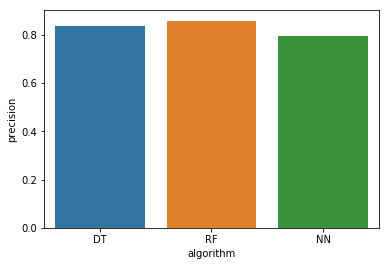

In [64]:
ax = sns.barplot(x="algorithm", y="precision", data=metrics_df)

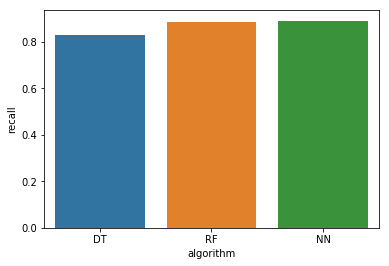

In [65]:
ax = sns.barplot(x="algorithm", y="recall", data=metrics_df)

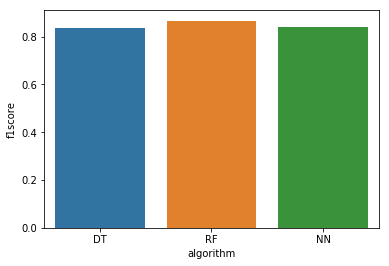

In [66]:
ax = sns.barplot(x="algorithm", y="f1score", data=metrics_df)

#### Provide a short explanation of the results you have shown and what it means. Which classification method performed better? Why? Contrast performance with classification from the previous homework and comment on the difference, if any

#### Based on the above bar charts, Random Forest has performed better in terms of F1-score, precision and recall. The parameters of RF are tuned to produce the optimum fit of the data. The perfomance of this classifier is better than Linear SVM or KNN that was used in the Homework. 

### 7. For Fun/Bonus: attempt at least one method to tackle the discrepancy in the size of the classes (imbalanced data) [+5]

In [67]:
bank_data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [68]:
!pip install imblearn 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import EasyEnsemble
ros = RandomOverSampler(random_state=42)
X_sampled, y_sampled = ros.fit_resample(X_train, y_train)

In [69]:
df = pd.DataFrame(y_sampled)
df.columns = ['y']
df['y'].value_counts()

yes    2566
no     2566
Name: y, dtype: int64

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_smote = RandomForestClassifier()
rf_clf_smote = rf_clf_smote.fit(X_sampled, y_sampled)
y_pred_smote = rf_clf_smote.predict(X_test.iloc[:,0:56])
print(classification_report(y_test,y_pred_smote))
print(accuracy_score(y_test,y_pred_smote))


              precision    recall  f1-score   support

          no       0.91      0.96      0.94      1102
         yes       0.46      0.26      0.33       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.69      0.61      0.64      1236
weighted avg       0.87      0.89      0.87      1236

0.8867313915857605


## Question 2:Parameter Selection and Classification (for dataset B)
### Classify dataset B using four classifiers: k-NN, Support Vector Machine (with RBF kernel), Random Forests and simple Neural Networks (MLPs). The objective is to experiment with parameter selection in training classifiers and to compare the performance of these well- known classification methods.

In [99]:
#Reading "DataDNA.csv" file:
df_b = pd.read_csv('DataDNA.csv',header=None)
df_b.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


In [100]:
df_b.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.00000,...,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,2.493182,2.529545,2.506818,2.526818,2.547727,2.492727,2.550000,2.541364,2.553182,2.56500,...,2.498636,2.497273,2.439091,2.495909,2.482273,2.435909,2.500455,2.456364,2.512273,0.033636
std,1.103943,1.086542,1.098160,1.118780,1.081699,1.099399,1.109818,1.103600,1.126751,1.10822,...,1.104786,1.070499,1.093583,1.087354,1.065672,1.089652,1.091952,1.093162,1.086456,0.999661
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,...,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,-1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000
75%,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.00000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


### 1. Preprocess the given data using the Z-score normalization on the data. Justify the choice of Z-score Normalization here, as opposed to min-max normalization. Why do you need normalization in general? Justify why you would normally split the test and training set randomly. What is the distribution of the +1,-1 classes in the dataset?

### Preprocess the given data using the Z-score normalization on the data.

In [101]:
df_y = df_b[57]
df_z = df_b.drop(57, axis=1)
#Importing required library:
from sklearn.preprocessing import StandardScaler
#Instantiating the function
z_score_scaler = StandardScaler()

z_score_transf = z_score_scaler.fit_transform(df_z)
z_score_transf

#Preparing dataframe
z_score_scaled_features_df = pd.DataFrame(z_score_transf, index=df_z.index, columns=df_z.columns)
z_score_scaled_features_df[57]=df_y
z_score_scaled_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-1.352898,-0.487479,-1.372441,-0.470994,-1.431156,-0.448281,0.405564,0.415676,0.396645,0.392611,...,0.453914,-0.464630,0.513026,1.383572,-0.452656,-0.400135,-0.458416,-0.417566,-1.392249,1
1,0.459203,0.433082,1.360021,-0.470994,-1.431156,-0.448281,-0.495689,1.322008,0.396645,-0.509943,...,-1.356803,1.404083,0.513026,1.383572,1.424521,1.435731,-1.374415,0.497419,1.369651,1
2,1.365253,-1.408039,1.360021,1.317075,1.342890,1.371309,-1.396943,-1.396986,-0.491065,-1.412496,...,-1.356803,-0.464630,-1.316240,-1.376046,1.424521,-0.400135,-0.458416,1.412405,1.369651,1
3,-1.352898,1.353642,-1.372441,-1.365028,0.418208,0.461514,1.306817,1.322008,0.396645,1.295164,...,-1.356803,0.469726,0.513026,1.383572,-1.391244,0.517798,0.457583,1.412405,-0.471615,-1
4,0.459203,1.353642,1.360021,0.423041,-1.431156,-1.358075,1.306817,1.322008,1.284354,-1.412496,...,0.453914,-1.398986,0.513026,-0.456173,-1.391244,1.435731,-0.458416,-1.332552,-1.392249,-1


### Justify the choice of Z-score Normalization here, as opposed to min-max normalization. 

### Ans. Z-score Normalization works well in this scenario since we get consistent mean-centred features with a unit scale variance. Also, our features are almost normally distributed. On the other hand, Min-Max scalar is sensitive to outliers and is used when distribution is non-Gaussian with small variance or standard deviation.

### Why do you need normalization in general?

### Ans. The prime objective of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. The objective functions of various machine learning classifiers are based on Euclidean distance, so if one of the feature has bigger values, this feature's distance will dominate the other features. As a result, the range of all the features should be changed by normalization so that each feature contributes equally (approx.) to the final distance. Furthermore, gradient descent converges faster with scaled features.

### Justify why you would normally split the test and training set randomly.

### Ans. We normally split the test and training set randomly to make sure there is no sampling bias introduced while training the data and testing it later. This also reduces the risk of having an overfitted model in the long run.

### What is the distribution of the +1,-1 classes in the dataset?¶

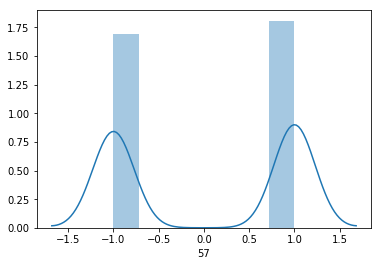

In [102]:
sns.distplot(z_score_scaled_features_df[57])

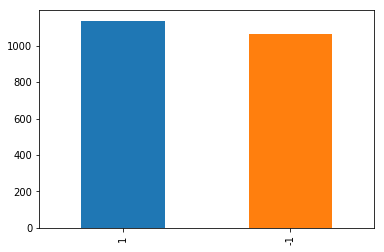

In [103]:
z_score_scaled_features_df[57].value_counts().plot(kind='bar')

In [104]:
z_score_scaled_features_df[57].value_counts()

 1    1137
-1    1063
Name: 57, dtype: int64

### Ans. We can say that both the classes are equally distributed without having any majority or minority class. From the distribution plot above we can infer the classes are normally distributed.

### 2. Parameter Selection:

### (a) For k-NN you need to evaluate the best value k to use. Using 5-fold cross validation on the training set evaluate k-NN on the values k=[1, 3, 5, 7, , 31]. The following link can be helpful:  https://scikit-learn.org/stable/modules/cross_validation.html
### Plot a figure that shows the relationship between the accuracy and the parameter k. Report the best k in terms of classification accuracy. Explain why you didnt evaluate directly on the test set.

In [105]:
from sklearn.model_selection import train_test_split
X = z_score_scaled_features_df.copy()
X.drop(57,axis=1,inplace=True)
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
Accuracy_kNN = []
for i in range(1,33,2):
    kNN = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(kNN, X_train, y_train, cv=5, scoring='accuracy')
    Accuracy_kNN.append(np.average(scores))                                              

Text(0, 0.5, 'Accuracy')

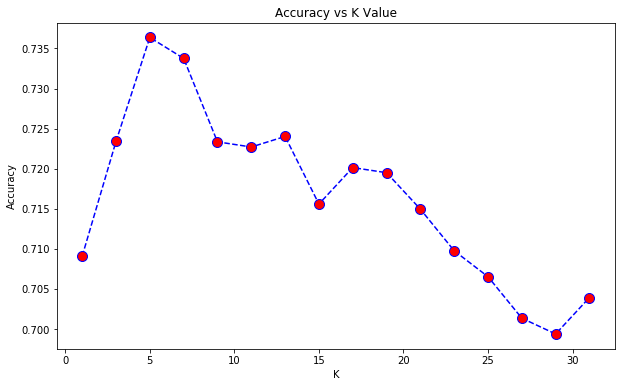

In [107]:
#Plotting K with Accuracy rate:
plt.figure(figsize=(10,6))
plt.plot(range(1,33,2),Accuracy_kNN,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Ans. Best k in terms of classification accuracy is k=5.
### We didn't evaluate directly on the test set because there is always a risk of overfitting on the test set i.e. knowledge about test set can hamper the model and the evaluation metric would no longer report on a generalizated scale.

### (b) For the RBF kernel SVM, there are two parameters to be decided: the soft margin penalty term "c" and the kernel width parameter "sigma". Again use 5-fold cross validation on the training set to select the parameter "c" from the set [0.1, 0.5, 1, 2, 5,10, 20, 50] and select the parameter "sigma" from the set [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]. Report the best parameters in terms of classication accuracy including plotting the ROC curves.

In [108]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='linear',random_state=0)

In [109]:
from sklearn.model_selection import GridSearchCV
paramters = [{'C':[0.1, 0.5, 1, 2, 5,10, 20, 50],'kernel':['rbf'],'gamma':[0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}]

In [110]:
grid_search = GridSearchCV(estimator=svm_rbf,param_grid=paramters,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_model = grid_search.fit(X_train,y_train)
accuracy_grid = grid_search.best_score_

In [111]:
accuracy_grid

0.9032467532467533

In [112]:
# Best parameter in terms of classification accuracy:
grid_search_model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [113]:
from sklearn.svm import SVC
svm_rbf_final = SVC(kernel='rbf',C=10,gamma=0.01,random_state=0)
svm_rbf_final.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
pred_svm = svm_rbf_final.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_svm))

0.896969696969697


In [115]:
#Roc curve:
from sklearn.metrics import roc_curve
roc_curve(y_test,pred_svm)

(array([0.        , 0.08411215, 1.        ]),
 array([0.        , 0.87905605, 1.        ]),
 array([ 2,  1, -1], dtype=int64))

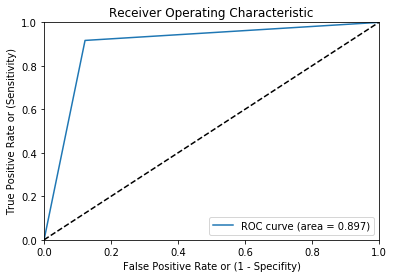

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(pred_svm,y_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### 3. Train (at least) six classifiers and report the results:
### (a) Classify the test set using k-NN, SVM, Random Forests and Neural Networks. Use the chosen parameters from the parameter selection process in question 2 for k-NN and SVM. For the next two classifiers use the default setups listed at the end for Random Forests and Neural Networks.

In [117]:
#Training kNN with K=3 selected from question 2:
kNN_3 = KNeighborsClassifier(n_neighbors=5)
scores_3 = cross_val_score(kNN_3, X_train, y_train, cv=5, scoring='accuracy')
np.average(scores_3)

0.7363677366033394

In [118]:
kNN_3.fit(X_train, y_train)
pred_kNN_3 =kNN_3.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_kNN_3))
print(accuracy_score(y_test,pred_kNN_3))

              precision    recall  f1-score   support

          -1       0.66      0.95      0.78       321
           1       0.92      0.54      0.68       339

   micro avg       0.74      0.74      0.74       660
   macro avg       0.79      0.75      0.73       660
weighted avg       0.80      0.74      0.73       660

0.740909090909091


In [119]:
#Training SVM with kernel='rbf', C=10, gamma=0.01 
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf',C=10,gamma=0.01,random_state=0)
svm_rbf.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
pred_svm_pre = svm_rbf.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_svm_pre))
print(accuracy_score(y_test,pred_svm_pre))

              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       321
           1       0.92      0.88      0.90       339

   micro avg       0.90      0.90      0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660

0.896969696969697


In [121]:
#Training Random Forest with default paramters:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier()
clf_rand.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
pred_random = clf_rand.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_random))
print(accuracy_score(y_test,pred_random))

              precision    recall  f1-score   support

          -1       0.93      0.97      0.95       321
           1       0.97      0.93      0.95       339

   micro avg       0.95      0.95      0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660

0.9484848484848485


In [123]:
#Training default neural network:
from sklearn.neural_network import MLPClassifier
clf_neural = MLPClassifier()
clf_neural.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [124]:
pred_Neural = clf_neural.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_Neural))
print(accuracy_score(y_test,pred_Neural))

              precision    recall  f1-score   support

          -1       0.89      0.92      0.90       321
           1       0.92      0.89      0.90       339

   micro avg       0.90      0.90      0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660

0.9015151515151515


### (b) For the fifth and sixth classifiers, you should explore the parameters of the Random Forests and Neural Network models to devise your own classifier instance that does better than the other methods. For example, you could consider a deeper neural network with multiple layers, use different optimization/solver algorithms, you could modify the Random Forests using different parameter settings for depth and number of trees or enable boosting. Play around with options and choose a setting for RFs and NNs that performs better.

In [128]:
#Random Forests
from pprint import pprint
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop =800 , num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Bootstrap setting
bootstrap = ['True','False']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': ['True', 'False'],
 'max_depth': [10, 30, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 600, 800]}


In [129]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
# First create the base model to tune
clf_rand = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = clf_rand, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [130]:
rf_random.best_params_

{'bootstrap': 'True',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [131]:
#Gradient Search Random Forest
clf_tune1 = RandomForestClassifier(bootstrap= True, max_depth= 30, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 400)
clf_tune1.fit(X_train, y_train)
pred_random = clf_tune1.predict(X_test)
print(classification_report(y_test,pred_random))
print(accuracy_score(y_test,pred_random))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       321
           1       0.98      0.96      0.97       339

   micro avg       0.97      0.97      0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660

0.9681818181818181


In [133]:
#Boosting:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
clf_ada = AdaBoostClassifier(base_estimator=clf_tune1,n_estimators=400,
                         learning_rate=1,
                         random_state=0)
clf_ada.fit(X_train, y_train)
pred_random = clf_ada.predict(X_test)
print(classification_report(y_test,pred_random))
print(accuracy_score(y_test,pred_random))

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97       321
           1       0.98      0.95      0.97       339

   micro avg       0.97      0.97      0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660

0.9681818181818181


In [134]:
#Neural Network:

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'hidden_layer_sizes' : [(50,30,20),(57,57,57),(57,57,57,57,57),(60,45,30,15)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha' : [0.0001,0.00001,0.000001],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
        }


In [135]:

grid_search = GridSearchCV(estimator = clf_neural, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  7.3min finished


In [138]:
print(best_grid)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(57, 57, 57), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [139]:
clf_neural = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(57,57,57), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
clf_neural.fit(X_train, y_train) 
pred_Neural = clf_neural.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred_Neural))
print(accuracy_score(y_test,pred_Neural))

              precision    recall  f1-score   support

          -1       0.88      0.93      0.91       321
           1       0.93      0.88      0.91       339

   micro avg       0.91      0.91      0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660

0.906060606060606


In [140]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import RepeatedKFold
# perform repeated cross validation

models = []
param=[]
lst1=[]
lst2=[]
lst3=[]
lst4=[]
lst5=[]
lst6=[]
models.append((lst1,"KNN",KNeighborsClassifier(n_neighbors=5)))
#models.append((lst2,"SVC",SVC(kernel='rbf',C=10,gamma=0.01,random_state=0)))
#models.append((lst3,"Random Forest(Default)",RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)))
#models.append((lst4,"Neural Networ(Default)",MLPClassifier(activation='relu',solver='adam', alpha=0.0001,hidden_layer_sizes=(100,), random_state=None)))
#models.append((lst5,"Random Forest(Optimal)",RandomForestClassifier(n_estimators=1400, min_samples_split=2, min_samples_leaf=1,max_features= 3,max_depth= 100,bootstrap= True)))
#models.append((lst6,"Neural Networ(Optimal)",MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,beta_2=0.999, early_stopping=False, epsilon=1e-08,hidden_layer_sizes=(57, 57, 57), learning_rate='constant',       learning_rate_init=0.001, max_iter=200, momentum=0.9,       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,validation_fraction=0.1, verbose=False, warm_start=False)))

rskf = RepeatedKFold(n_splits=4, n_repeats=20,random_state=101)

names = []
param=[]
for param,name,model in models:
    for train_index, test_index in rskf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        scoring = ['precision_macro', 'recall_macro','accuracy','f1']
        scores = cross_validate(model, X_train, y_train, cv=rskf, scoring=scoring)
        sorted(scores.keys())
        #lst.append([("%0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))],[("%0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))],[("%0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))],[("%0.2f (+/- %0.2f)" % (scores['test_f1'].mean(), scores['test_f1'].std() * 2))],[("%0.2f (+/- %0.2f)" % (scores['fit_time'].mean(), scores['fit_time'].std() * 2))],[("%0.2f (+/- %0.2f)" % (scores['score_time'].mean(), scores['score_time'].std() * 2))])
    param.append([("%0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))])
    param.append([("%0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))])
    param.append([("%0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))])
    param.append([("%0.2f (+/- %0.2f)" % (scores['test_f1'].mean(), scores['test_f1'].std() * 2))])
    param.append([("%0.2f (+/- %0.2f)" % (scores['fit_time'].mean(), scores['fit_time'].std() * 2))])
    param.append([("%0.2f (+/- %0.2f)" % (scores['score_time'].mean(), scores['score_time'].std() * 2))])
    #metric_df=pd.DataFrame(lstq)
    names.append(name)

for i in range(len(names)):
    print(names[i])

KeyboardInterrupt: 

In [118]:
metric_df=pd.DataFrame()
data={'Parameters':['accuracy','precision','recall','F1-Score','Training_time','Classification_time'],'KNN': lst1[0:6], 'SVM': lst2[0:6],
     'Random Forest(Default)': lst3[0:6], 'Neural Network(Default)': lst4[0:6],
     'Random Forest(Tuned)': lst5[0:6], 'Neural Network(Tuned)':lst6[0:6]}
metric_df=pd.DataFrame(data=data)
metric_df

,Parameters,KNN,SVM,Random Forest(Default),Neural Network(Default),Random Forest(Tuned),Neural Network(Tuned)
0,accuracy,[0.71 (+/- 0.02)],[0.88 (+/- 0.06)],[0.91 (+/- 0.05)],[0.87 (+/- 0.06)],[0.95 (+/- 0.04)],[0.87 (+/- 0.09)]
1,precision,[0.77 (+/- 0.01)],[0.88 (+/- 0.06)],[0.91 (+/- 0.05)],[0.87 (+/- 0.06)],[0.95 (+/- 0.04)],[0.87 (+/- 0.09)]
2,recall,[0.72 (+/- 0.02)],[0.88 (+/- 0.06)],[0.91 (+/- 0.05)],[0.87 (+/- 0.06)],[0.95 (+/- 0.04)],[0.87 (+/- 0.09)]
3,F1-Score,[0.63 (+/- 0.04)],[0.88 (+/- 0.06)],[0.91 (+/- 0.05)],[0.87 (+/- 0.06)],[0.95 (+/- 0.04)],[0.87 (+/- 0.09)]
4,Training_time,[0.00 (+/- 0.00)],[0.08 (+/- 0.01)],[0.10 (+/- 0.00)],[1.97 (+/- 0.56)],[2.14 (+/- 0.40)],[0.13 (+/- 0.01)]
5,Classification_time,[0.09 (+/- 0.00)],[0.05 (+/- 0.00)],[0.04 (+/- 0.01)],[0.01 (+/- 0.01)],[0.68 (+/- 0.16)],[0.00 (+/- 0.00)]


### Explain why the classification was repeated 20 times


### The experiment is repeated 20 times with varying training-test set. It ensures that the model is trained on all the subsets of data and it makes the model generalizable and avoid overfitting.

### Comment on the obtained results, what are the benefits and weaknesses of each method on this dataset. How could this analysis help to make the choice of the right method to use for a dataset of this type in the future?

#### From the above results it is evident that Random Forest outperforms the other models. It has the highest accuracy 95%. KNN gives low accuracy of 70%. SVM and Random Forest did a good job in classifying with decent accuracy.
#### Model Comparison:                                                                                                                                                                                     
KNN
Benefits: It can be used as a baseline model for comparing advanced classification models. It has the lowest training time.
Drawbacks: Classification time is very high. Need to decide the optimum number of neighbors.

SVM:
Benefits: The training time is less compared to  other model becasue once the decision boundary is established, we need only a set points called Support Vectors which helps in classification.  It is a powerful classifier and after tuning the Hyperprameters Sigma and C, the accuracy improved.
Drawbacks: It tries to overfit if the parameters (Sigma/Gamma) is too low then the influence of the farthest data point affect the decision boundary. For parameter C,If C is too high the model overfits and viceversa.

Random Forest:
Benefits: Good model for this classification as it gives the highest accuracy.Since its an ensemble of trees, the accuracy is based on the average of collection of trees
Drawbacks: Classification time and training time is more compared to other models.
Trining time increases as the Depth of the tree increses. Need to choose the number of trees.Tuning the HyperParameters is difficult.(Gridsearch takes time to runon large no. of parameters).

Neural Network:
Benefits: Classification time is very less compared to other models. 
Drawbacks: Tuning the HyperParameters is difficult. Increasing the number of hidden layer didnot yield good accuracy.
There is no method to slelct the best method.Computationally expensive.


### If you had to remove 1 features from the dataset, which feature would you select to remove from the dataset and why? What would have happened if you did classification on two dimensions only?

In [121]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
ext_tr = ExtraTreesClassifier()
ext_tr.fit(X,y)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

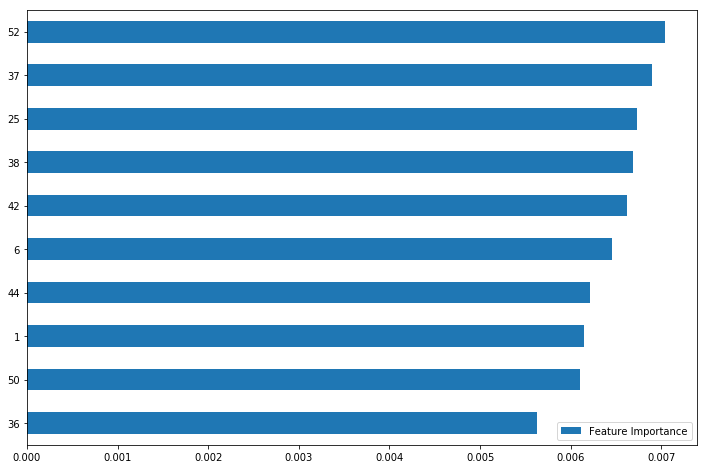

In [125]:
#Creating Dataframe:
feat_importances = pd.DataFrame(ext_tr.feature_importances_, index=X.columns,columns=['Feature Importance'])
bottom_features = feat_importances.sort_values(by=['Feature Importance']).head(10)

#Plotting:
fig, ax = plt.subplots(figsize=(12, 8))
bottom_features.plot(kind='barh',ax=ax)
plt.show()

### From the above Tree classifier, which rates the features from most important to the least, it is clear that the Feature36 adds less value to the model and hence it can be removed. 

In [137]:
# Having only 2 dimensions:
new_X = z_score_scaled_features_df.copy()
new_X=new_X.iloc[:,0:2]
new_y = df_y
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=101)


svm_rbf_final = SVC(kernel='rbf',C=10,gamma=0.01,random_state=0)
svm_rbf_final.fit(X_train,y_train)
pred_random = svm_rbf_final.predict(X_test)
print(classification_report(y_test,pred_random))
print(accuracy_score(y_test,pred_random))

              precision    recall  f1-score   support

          -1       0.49      0.27      0.35       321
           1       0.51      0.73      0.60       339

   micro avg       0.51      0.51      0.51       660
   macro avg       0.50      0.50      0.48       660
weighted avg       0.50      0.51      0.48       660

0.5075757575757576


#### Having only 2 dimensions reduces the accuracy to 50%, which is no better than flipping a coin. This is because the model doesnot have enough features to learn and fit the data.